In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import os

In [2]:
#ks_daily = pd.read_csv("https://api.covidtracking.com/v1/states/ks/daily.csv")
#nj_daily = pd.read_csv("https://api.covidtracking.com/v1/states/ks/daily.csv")

#All of U.S.
us_daily = pd.read_csv("https://api.covidtracking.com/v1/states/daily.csv")

#https://covidtracking.com/data
#CSVs obtained from call to https://api.covidtracking.com/v1/states/{state}/daily.csv
url = "https://api.covidtracking.com/v1/states/"
states = ["ks", "nj"]
current = "/current.json"
daily_csv = "/daily.csv"

#retrieve csv from API
for state in states:
    query_url = f"{url}{state}{daily_csv}"
    response_csv = requests.get(query_url)
    #cases_csv = response.csv()
    print(response_csv.url)

https://api.covidtracking.com/v1/states/ks/daily.csv
https://api.covidtracking.com/v1/states/nj/daily.csv


In [4]:
ks_file = pd.read_csv("https://api.covidtracking.com/v1/states/ks/daily.csv")
nj_file = pd.read_csv("https://api.covidtracking.com/v1/states/nj/daily.csv")
ks_file.columns

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'death

In [22]:
nj_usa = pd.DataFrame(nj_file[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
#nj_usa = nj_usa.set_index(["date", "state"])
nj_usa["Percentage"] = nj_usa["positiveIncrease"]/nj_usa["totalTestResultsIncrease"]
nj_usa["Active Cases"] = nj_usa["positive"] - nj_usa["recovered"]
nj_usa[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]] = nj_usa[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]].fillna(0)
nj_usa["Percentage"] = nj_usa["Percentage"].astype(float).map("{:.2%}".format)
nj_usa

,date,state,positive,negative,positiveIncrease,negativeIncrease,death,deathIncrease,totalTestResultsIncrease,totalTestResults,recovered,Percentage,Active Cases
0,20200826,NJ,190306.0,2531278.0,285,23404,15914,-39,23689,2721584,33692.0,1.20%,156614.0
1,20200825,NJ,190021.0,2507874.0,302,20781,15953,4,21083,2697895,33646.0,1.43%,156375.0
2,20200824,NJ,189719.0,2487093.0,225,27589,15949,3,27814,2676812,33626.0,0.81%,156093.0
3,20200823,NJ,189494.0,2459504.0,258,0,15946,3,258,2648998,33615.0,100.00%,155879.0
4,20200822,NJ,189236.0,2459504.0,419,32629,15943,2,33048,2648740,33555.0,1.27%,155681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,20200214,NJ,0.0,0.0,0,0,0,0,0,0,0.0,0.00%,0.0
195,20200213,NJ,0.0,0.0,0,0,0,0,0,0,0.0,0.00%,0.0
196,20200212,NJ,0.0,0.0,0,0,0,0,0,0,0.0,0.00%,0.0
197,20200211,NJ,0.0,0.0,0,0,0,0,0,0,0.0,0.00%,0.0


In [20]:
ks_usa = pd.DataFrame(ks_file[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
#ks_usa = ks_usa.set_index(["date", "state"])
ks_usa["Percentage"] = ks_usa["positiveIncrease"]/ks_usa["totalTestResultsIncrease"]
ks_usa["Active Cases"] = ks_usa["positive"] - ks_usa["recovered"]
ks_usa[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]] = ks_usa[["Percentage", "death", "recovered", "Active Cases", "positive", "negative"]].fillna(0)
ks_usa["Percentage"] = ks_usa["Percentage"].astype(float).map("{:.2%}".format)
ks_usa

,date,state,positive,negative,positiveIncrease,negativeIncrease,death,deathIncrease,totalTestResultsIncrease,totalTestResults,recovered,Percentage,Active Cases
0,20200826,KS,39937,355160,1536,6604,437.0,11,8140,395097,1624.0,18.87%,38313.0
1,20200825,KS,38401,348556,0,0,426.0,0,0,386957,1535.0,0.00%,36866.0
2,20200824,KS,38401,348556,1545,19097,426.0,7,20642,386957,1535.0,7.48%,36866.0
3,20200823,KS,36856,329459,0,0,419.0,0,0,366315,1520.0,0.00%,35336.0
4,20200822,KS,36856,329459,0,0,419.0,0,0,366315,1520.0,0.00%,35336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,20200310,KS,1,17,0,6,0.0,0,6,18,0.0,0.00%,0.0
170,20200309,KS,1,11,0,0,0.0,0,0,12,0.0,0.00%,0.0
171,20200308,KS,1,11,1,0,0.0,0,1,12,0.0,100.00%,0.0
172,20200307,KS,0,11,0,7,0.0,0,7,11,0.0,0.00%,0.0


In [7]:
ks_march = ks_usa.loc[(ks_usa["date"] >= 20200301) & (ks_usa["date"] <= 20200331),:]
nj_march = nj_usa.loc[(nj_usa["date"] >= 20200301) & (nj_usa["date"] <= 20200331),:]
nj_march = nj_march.loc[(nj_usa["positive"] >0),:]

In [8]:
ks_march = ks_march.sort_values("date", ascending = True)
nj_march = nj_march.sort_values("date", ascending = True)

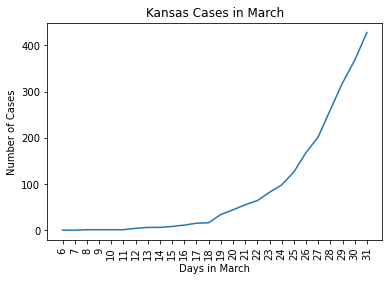

In [9]:
ks_date = np.arange(6,32)
ks_cases = ks_march["positive"]

plt.plot(ks_date, ks_cases)
plt.xticks(np.arange(min(ks_date), max(ks_date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases in March")
plt.savefig("Images/ks_test_graph.png")
plt.show()

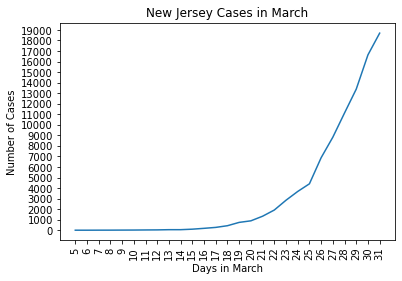

In [10]:
nj_date = np.arange(5,32)
nj_cases = nj_march["positive"]

plt.plot(nj_date, nj_cases)
plt.xticks(np.arange(min(nj_date), max(nj_date)+1, 1.0), rotation = "vertical")
plt.yticks(np.arange(min(nj_cases)-1, max(nj_cases)+1000, 1000.0))
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases in March")
plt.ylim(None, max(nj_cases)+1000)
plt.savefig("Images/nj_test_graph.png")
plt.show()

In [11]:
ks_april = ks_usa.loc[(ks_usa["date"] >= 20200401) & (ks_usa["date"] <= 20200430),:]
nj_april = nj_usa.loc[(nj_usa["date"] >= 20200401) & (nj_usa["date"] <= 20200430),:]
ks_april = ks_april.sort_values("date", ascending = True)
nj_april = nj_april.sort_values("date", ascending = True)
print(len(nj_april))

30


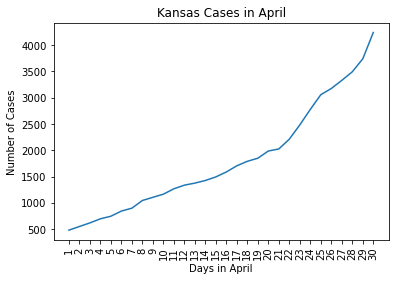

In [12]:
date = np.arange(1,31)
ks_april_cases = ks_april["positive"]

plt.plot(date, ks_april_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("Kansas Cases in April")
plt.savefig("Images/ks_april_test_graph.png")
plt.show()

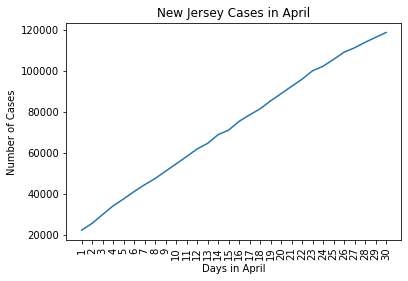

In [13]:
date = np.arange(1,31)
nj_april_cases = nj_april["positive"]

plt.plot(date, nj_april_cases)
plt.xticks(np.arange(min(date), max(date)+1, 1.0), rotation = "vertical")
#plt.yticks(np.arange(min(nj_april_cases)-1, max(nj_april_cases)+1000, 1000.0))
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cases in April")
#plt.ylim(None, max(nj_april_cases)+1000)
plt.savefig("Images/nj_april_test_graph.png")
plt.show()

In [28]:
frames = [ks_usa, nj_usa]

merged_states = pd.concat(frames)
merged_states = merged_states.set_index("date")
merged_states = merged_states.sort_values("date", ascending = False)
#merged_states = merged_states.drop()
#merged_states.columns

In [29]:
merged_states.head()

,state,positive,negative,positiveIncrease,negativeIncrease,death,deathIncrease,totalTestResultsIncrease,totalTestResults,recovered,Percentage,Active Cases
date,,,,,,,,,,,,
20200826,KS,39937.0,355160.0,1536,6604,437.0,11,8140,395097,1624.0,18.87%,38313.0
20200826,NJ,190306.0,2531278.0,285,23404,15914.0,-39,23689,2721584,33692.0,1.20%,156614.0
20200825,KS,38401.0,348556.0,0,0,426.0,0,0,386957,1535.0,0.00%,36866.0
20200825,NJ,190021.0,2507874.0,302,20781,15953.0,4,21083,2697895,33646.0,1.43%,156375.0
20200824,KS,38401.0,348556.0,1545,19097,426.0,7,20642,386957,1535.0,7.48%,36866.0


In [30]:
merged_states.to_csv('Resources/ks_nj_daily.csv')